**Project:** Neural Mahine Translation

**Model:** Seq2Seq

**Dataset:** Parallel Corpora  https://tatoeba.org/eng/downloads




In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/dataset/NLP_parallel_corpus/sentences.csv'


In [0]:
import pandas as pd

input_file1 = "/content/drive/My Drive/dataset/NLP_parallel_corpus/sentences.csv"
data = pd.read_csv( input_file, header=None, sep="\t", quotechar='\0', names = ["No.","Language", "Sentence"])

#input_file2 = "/content/drive/My Drive/dataset/NLP_parallel_corpus/jpn_indices.csv"
#indices = pd.read_csv( input_file2, header=None, sep="\t", quotechar='\0')

In [0]:
data.head()

,No.,Language,Sentence
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！


In [0]:
print(pd.pivot_table(data, index='Language'))


                   No.
Language              
\N        7.338813e+06
abk       3.327686e+06
acm       2.053503e+06
ady       5.476639e+06
afb       6.788540e+06
afh       5.215983e+06
afr       4.193720e+06
aii       6.595904e+06
ain       3.136319e+06
akl       6.983687e+06
aln       6.983657e+06
amh       3.497513e+06
ang       1.937635e+06
aoz       6.759456e+06
apc       4.681724e+06
ara       3.995655e+06
arg       7.260504e+06
arq       5.020622e+06
ary       6.540784e+06
arz       1.692687e+06
asm       6.372032e+06
ast       3.511177e+06
avk       3.375990e+06
awa       3.589367e+06
aym       3.836946e+06
aze       4.105521e+06
bak       4.355784e+06
bam       4.681767e+06
ban       4.786380e+06
bar       5.943837e+06
...                ...
tuk       7.765883e+06
tur       4.396002e+06
tvl       5.047201e+06
tyv       6.966809e+06
tzl       5.208387e+06
udm       5.242986e+06
uig       1.468343e+06
ukr       5.635330e+06
umb       7.552308e+06
urd       2.633337e+06
urh       3

In [0]:
print(data.groupby('Language').Sentence.count())

Language
\N         75
abk        26
acm        48
ady        31
afb       119
afh        79
afr      3889
aii         5
ain        22
akl        27
aln        28
amh       193
ang       144
aoz        24
apc        46
ara     33284
arg       103
arq      1335
ary        53
arz       609
asm        43
ast       177
avk      3908
awa       253
aym         2
aze      4902
bak       187
bam        13
ban         3
bar       147
        ...  
tuk      6720
tur    670223
tvl        14
tyv        11
tzl       185
udm        67
uig      7591
ukr    147304
umb        30
urd      1934
urh         1
uzb       652
vec        18
vep        12
vie     10421
vol      2927
vro        15
war      2026
wln        53
wol        27
wuu      4311
xal       869
xho       152
yid      1252
yor        35
yue      5915
zlm        92
zsm      2354
zul        37
zza       816
Name: Sentence, Length: 342, dtype: int64


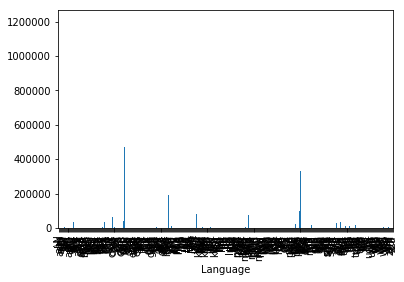

In [0]:
import matplotlib.pyplot as plt

data.groupby('Language').Sentence.count().plot.bar(ylim=0)
plt.show()

In [0]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

Using TensorFlow backend.
